In [1]:

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer, Binarizer, StandardScaler, OrdinalEncoder, MinMaxScaler, Normalizer, OneHotEncoder, StandardScaler, FunctionTransformer, RobustScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_validate, cross_val_predict, learning_curve, validation_curve
from sklearn.metrics import roc_curve, roc_auc_score, cohen_kappa_score, matthews_corrcoef, average_precision_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import PowerTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OrdinalEncoder, FunctionTransformer
from sklearn.pipeline import make_pipeline, FeatureUnion
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.ensemble import BaggingClassifier


from sklearn.ensemble import VotingClassifier


from sklearn import set_config
set_config(transform_output='pandas')
random_state=42


In [2]:

# Wczytanie danych z pliku 
df = pd.read_excel("dane_szkoła.xlsx")
#df = pd.read_excel("wygenerowane_nauka9.xlsx")
display(df.head())

# Wydzielenie X (zmienne objaśniające) i y (zmienna docelowa)
X = df.drop('czy zdał egzamin', axis=1)
y = df['czy zdał egzamin']

print('Typy zmiennych:')
print(df.dtypes)
print()

print(f'Zmienne predykcyjne X: {X.columns.tolist()}')
print(f'Zmienna celu        y: {y.name}')
print()
numeric_variables = X.select_dtypes(include=['int64', 'float64'])
numeric_variable_names = numeric_variables.columns.tolist()
print(f'Zmienne liczbowe: {numeric_variable_names}')
print()
non_numeric_variables = X.select_dtypes(exclude=['int64', 'float64'])
non_numeric_variable_names = non_numeric_variables.columns.tolist()
print(f'Zmienne tekstowe: {non_numeric_variable_names}')
print()



# Podział danych na zbiór treningowy i testowy
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# Podział danych na zbiór treningowy (70%) i zbiór pozostały (30%)
X_train, X_remainder, y_train, y_remainder = train_test_split(X, y, test_size=0.3, random_state=42)

# Podział zbioru pozostałego na zbiór walidacyjny (50%) i zbiór testowy (50%)
X_val, X_test, y_val, y_test = train_test_split(X_remainder, y_remainder, test_size=0.5, random_state=42)



shape_dict = {  "Dane": ["X", "y", "X_train","y_train", "X_val", "y_val", "X_test", "y_test"],
                "Rozmiar": [X.shape,y.shape,X_train.shape,y_train.shape,X_val.shape,y_val.shape, X_test.shape,y_test.shape,],}

shape_df = pd.DataFrame(shape_dict)
display(shape_df)


prop_y = { 'Struktura danych "y_train"': y_train.value_counts(normalize=True) * 100,
        'Struktura danych "y_val"': y_val.value_counts(normalize=True) * 100,
        'Struktura danych "y_test"': y_test.value_counts(normalize=True) * 100 }


proporcje_y = pd.DataFrame(prop_y)
display(proporcje_y.round(2))


print(f'Struktura danych X_train: {(X_train.shape[0]/X.shape[0])*100}%')
print(f'Struktura danych X_val: {(X_val.shape[0]/X.shape[0])*100}%')
print(f'Struktura danych X_test: {(X_test.shape[0]/X.shape[0])*100}%')




,płeć,pali,wykształcenie,liczba osób,typ szkoły,dochód roczny,srednia ocen sem,tryb nauki,zamieszkanie,problemy z rówieśnikami,czas do szkoły min,godzin nauki przed egzaminem,nadużywanie alkoholu,poziom stresu,korzystanie z korepetycji,czas spedzany tygodniu na social mediach w godz,ulubione social media,czy zdał egzamin
0,kobieta,nie,wyższe,6,publiczna,101596.44,3.92,zdalny,małe miasteczko,nie,24,23,nie,6,tak,27,Facebook,nie
1,kobieta,nie,wyższe,2,prywatna,58929.47,2.25,stacjonarny,miasto duże,nie,24,44,nie,5,nie,17,Facebook,tak
2,kobieta,nie,średnie,1,prywatna,62395.03,3.61,hybrydowy,miasto duże,tak,25,49,nie,2,nie,20,Instagram,tak
3,kobieta,tak,wyższe,4,prywatna,81921.61,3.25,hybrydowy,małe miasteczko,tak,26,50,nie,4,nie,17,Instagram,nie
4,kobieta,nie,wyższe,1,prywatna,87863.56,3.12,zdalny,miasto duże,tak,24,37,nie,6,nie,19,LinkedIn,tak


Typy zmiennych:
płeć                                                object
pali                                                object
wykształcenie                                       object
liczba osób                                          int64
typ szkoły                                          object
dochód roczny                                      float64
srednia ocen sem                                   float64
tryb nauki                                          object
zamieszkanie                                        object
problemy z rówieśnikami                             object
czas do szkoły min                                   int64
godzin nauki przed egzaminem                         int64
nadużywanie alkoholu                                object
poziom stresu                                        int64
korzystanie z korepetycji                           object
czas spedzany tygodniu na social mediach w godz      int64
ulubione social media                   

,Dane,Rozmiar
0,X,"(1000, 17)"
1,y,"(1000,)"
2,X_train,"(700, 17)"
3,y_train,"(700,)"
4,X_val,"(150, 17)"
5,y_val,"(150,)"
6,X_test,"(150, 17)"
7,y_test,"(150,)"


,"Struktura danych ""y_train""","Struktura danych ""y_val""","Struktura danych ""y_test"""
czy zdał egzamin,,,
tak,51.86,52.67,54.67
nie,48.14,47.33,45.33


Struktura danych X_train: 70.0%
Struktura danych X_val: 15.0%
Struktura danych X_test: 15.0%


In [3]:


# Utwórz instancję LabelEncoder
label_encoder = LabelEncoder()

# Przekształć zmienną y
y_encoded = label_encoder.fit_transform(y)

In [4]:
# Preprocesing


class DochodNaOsobe(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['dochód_na_osobę'] = X['dochód roczny'] / X['liczba osób']
        X = X.drop(columns=['dochód roczny', 'liczba osób'])
        encoder = StandardScaler()
        X['encoded_dochód_na_osobę'] = encoder.fit_transform(X[['dochód_na_osobę']])
        X = X.drop(columns=['dochód_na_osobę'])
        return X.round(2)



class GrupaSocialMedia(BaseEstimator, TransformerMixin):
    def __init__(self, quantiles=[0, 0.25, 0.5, 0.75, 1], labels=['niski', 'średni', 'wysoki', 'bardzo wysoki']):
        self.quantiles = quantiles
        self.labels = labels
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_copy = X.copy()
        X_copy['grupa social media'] = pd.qcut(X_copy['czas spedzany tygodniu na social mediach w godz'], q=self.quantiles, labels=self.labels)
        encoder = OrdinalEncoder()
        X_copy['encoded_grupa_social media'] = encoder.fit_transform(X_copy[['grupa social media']])
        X_copy = X_copy.drop(columns=['grupa social media','czas spedzany tygodniu na social mediach w godz'])
        return X_copy



def GrupaGodzinyNauki(X, quantiles=[0, 0.4, 1], labels=['niski', 'wysoki']):
    X_copy = X.copy()
    X_copy['grupa godziny nauki'] = pd.qcut(X_copy['godzin nauki przed egzaminem'], q=quantiles, labels=labels)
    encoder = OrdinalEncoder()
    X_copy['encoded_grupa godziny nauki'] = encoder.fit_transform(X_copy[['grupa godziny nauki']])
    X_copy = X_copy.drop(columns=['grupa godziny nauki','godzin nauki przed egzaminem'])
    return X_copy




binary_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(sparse_output=False, handle_unknown='ignore',drop='if_binary',dtype='int'))
ordinal_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),OrdinalEncoder(categories=[['podstawowe', 'zawodowe', 'średnie', 'wyższe'],
                                                                                                   ['wieś','małe miasteczko','miasto średnie', 
                                                                                                    'miasto duże' , 'miasto pow. 500 tys.']],dtype='int')) 
ohe_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(sparse_output=False,handle_unknown='ignore'),)    
ohe_rare_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(sparse_output=False,handle_unknown='infrequent_if_exist', max_categories=5, dtype='int'))    
numeric_pipeline = make_pipeline(StandardScaler())  
binarizer_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),Binarizer(threshold=20)) #>20min
kbins_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform'))

DochodNaOsobe_pipeline = make_pipeline(DochodNaOsobe())
GrupaSocialMedia_pipeline = make_pipeline(GrupaSocialMedia())

GrupaGodzinyNauki_transformer = FunctionTransformer(GrupaGodzinyNauki, validate=False)
GrupaGodzinyNauki_pipeline = make_pipeline(GrupaGodzinyNauki_transformer)


transformers = [
    ('binary', binary_pipeline, ['płeć', 'pali', 'problemy z rówieśnikami', 'typ szkoły', 'nadużywanie alkoholu', 'korzystanie z korepetycji']),
    ('ordinal', ordinal_pipeline, ['wykształcenie', 'zamieszkanie']),
    ('ohe', ohe_pipeline, ['tryb nauki']),
    ('ohe_rare', ohe_rare_pipeline, ['ulubione social media']),
    ('DochodNaOsobe', DochodNaOsobe_pipeline, ['dochód roczny', 'liczba osób']),
    ('numerical', numeric_pipeline, ['srednia ocen sem']),
    ('GrupaSocialMedia', GrupaSocialMedia_pipeline, ['czas spedzany tygodniu na social mediach w godz']), 
    ('GrupaGodzinyNauki', GrupaGodzinyNauki_pipeline, ['godzin nauki przed egzaminem']), 
    ('GrupaCzas', binarizer_pipeline, ['czas do szkoły min']), 
    ('GrupaStres', kbins_pipeline, ['poziom stresu']), ]


preprocessor = ColumnTransformer(
    transformers=transformers,
    verbose_feature_names_out=False,
    remainder='passthrough')




X_transformed = preprocessor.fit_transform(X_train)
X_transformed_rounded = pd.DataFrame(X_transformed).round(2)

display(X_transformed_rounded.head().T)

,541,440,482,422,778
płeć_mężczyzna,0.00,0.00,1.00,1.00,1.00
pali_tak,0.00,0.00,1.00,0.00,0.00
problemy z rówieśnikami_tak,0.00,1.00,1.00,1.00,1.00
typ szkoły_publiczna,1.00,1.00,1.00,0.00,1.00
nadużywanie alkoholu_tak,0.00,0.00,0.00,0.00,0.00
korzystanie z korepetycji_tak,1.00,0.00,1.00,0.00,1.00
wykształcenie,3.00,2.00,2.00,3.00,0.00
zamieszkanie,0.00,0.00,4.00,3.00,2.00
tryb nauki_hybrydowy,0.00,1.00,1.00,0.00,0.00
tryb nauki_stacjonarny,0.00,0.00,0.00,0.00,1.00


In [5]:

# Pipeline modelu

# METODY MODELI POJEDYNCZYCH - PARAMETRY DOMYŚLNE

pipe_SVC = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVC(probability=True))])

pipe_GaussianNB = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GaussianNB())])

pipe_LogisticRegression = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())])

pipe_KNeighborsClassifier = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier())])

pipe_DecisionTreeClassifier = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier())])

pipe_LinearDiscriminantAnalysis = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearDiscriminantAnalysis())])

pipe_QuadraticDiscriminantAnalysis = Pipeline([
    ('preprocessor', preprocessor),
    ('model', QuadraticDiscriminantAnalysis())])


# METODY ZESTPOŁOWE

# a) zesspoły drzew i lasy drzew

pipe_RandomForest = Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier())])

pipe_ExtraTrees = Pipeline([
    ('preprocessor', preprocessor),
    ('model', ExtraTreesClassifier()) ])


# b) Boosting:

    # 1.  Adaptive Boosting

pipe_AdaBoost = Pipeline([
        ('preprocessor', preprocessor),
        ('model', AdaBoostClassifier())])

    # 2.  Gradient Boosting:

pipe_GradientBoosting = Pipeline([
        ('preprocessor', preprocessor),
        ('model', GradientBoostingClassifier())])

# c) bagging
 
pipe_BaggingWithReplacement_tree = Pipeline([
    ('preprocessor', preprocessor),
    ('model', BaggingClassifier(
    base_estimator=DecisionTreeClassifier()))])




# Stworzenie słownika klasyfikatorów

klasyfikatory = {
    'SVC': pipe_SVC,
    'GaussianNB': pipe_GaussianNB,
    'LogisticRegression': pipe_LogisticRegression,
    'KNeighborsClassifier': pipe_KNeighborsClassifier,
    'DecisionTreeClassifier': pipe_DecisionTreeClassifier,
    'LinearDiscriminantAnalysis': pipe_LinearDiscriminantAnalysis,
    'QuadraticDiscriminantAnalysis': pipe_QuadraticDiscriminantAnalysis,
    'Random Forest': pipe_RandomForest,
    'ExtraTreesClassifier': pipe_ExtraTrees,
    'AdaBoost': pipe_AdaBoost,
    'BaggingClassifier_tree': pipe_BaggingWithReplacement_tree,
}



In [6]:
# Stworzenie obiektu Cross-Validation (StratifiedKFold) do walidacji krzyżowej

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


 Wyniki skuteczności - ewaluacji modelu wg CV dla róznych modeli klasyfikacyjnych na ustawieniach domyślnych:


,mean score_time,std score_time,mean train_score,mean test_score,std test_score,std train_score
Klasyfikator,,,,,,
DecisionTreeClassifier,0.018,0.005,1.000,0.709,0.044,0.000
QuadraticDiscriminantAnalysis,0.017,0.001,0.736,0.710,0.102,0.080
GaussianNB,0.016,0.003,0.775,0.750,0.041,0.006
BaggingClassifier_tree,0.022,0.008,0.988,0.773,0.023,0.004
LogisticRegression,0.018,0.003,0.799,0.777,0.040,0.005
LinearDiscriminantAnalysis,0.018,0.005,0.800,0.784,0.035,0.007
AdaBoost,0.022,0.007,0.829,0.789,0.041,0.005
KNeighborsClassifier,0.029,0.016,0.850,0.793,0.050,0.009
ExtraTreesClassifier,0.023,0.008,1.000,0.803,0.040,0.000


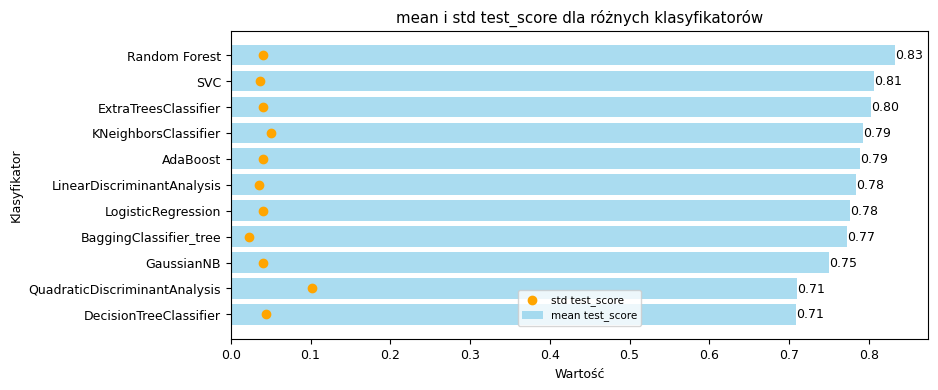

In [7]:
# ewaluacja modelu wg CV dla róznych modeli klasyfikacyjnych na ustawieniach domyślnych:

wyniki_srednie_test = []
wyniki_std_test = []
wyniki_srednie_train = []
wyniki_std_train = []
wyniki_srednie_score_time = []
wyniki_std_score_time = []

for klasyfikator_nazwa, klasyfikator in klasyfikatory.items():
    wyniki = cross_validate(klasyfikator, X_train, y_train, cv=cv, scoring='accuracy', return_train_score=True)
    
    srednia_test = round(wyniki['test_score'].mean(), 3)
    odchylenie_std_test = round(wyniki['test_score'].std(), 3)
    srednia_train = round(wyniki['train_score'].mean(), 3)
    odchylenie_std_train = round(wyniki['train_score'].std(), 3)
    srednia_score_time = round(wyniki['score_time'].mean(), 3)
    odchylenie_std_score_time = round(wyniki['score_time'].std(), 3)
    wyniki_srednie_test.append(srednia_test)
    wyniki_std_test.append(odchylenie_std_test)
    wyniki_srednie_train.append(srednia_train)
    wyniki_std_train.append(odchylenie_std_train)
    wyniki_srednie_score_time.append(srednia_score_time)
    wyniki_std_score_time.append(odchylenie_std_score_time)


wyniki_df = pd.DataFrame({
    'Klasyfikator': list(klasyfikatory.keys()),
    'mean score_time': wyniki_srednie_score_time,
    'std score_time': wyniki_std_score_time,
    'mean train_score': wyniki_srednie_train,
    'mean test_score': wyniki_srednie_test,
    'std test_score': wyniki_std_test, 
    'std train_score': wyniki_std_train,
   
    
    })

print(f' Wyniki skuteczności - ewaluacji modelu wg CV dla róznych modeli klasyfikacyjnych na ustawieniach domyślnych:')
wyniki_df.set_index('Klasyfikator', inplace=True)
wyniki_df.sort_values(by = 'mean test_score', ascending=True, inplace=True)
display(wyniki_df)


plt.figure(figsize=(9, 4)) 
plt.rc('font', size=9)
plt.barh(wyniki_df.index, wyniki_df['mean test_score'], color='skyblue', alpha=0.7, label='mean test_score')
plt.scatter(wyniki_df['std test_score'], wyniki_df.index, marker='o', color='orange', label='std test_score')
# Dodawanie wartości na słupki
for index, value in enumerate(wyniki_df['mean test_score']):
    plt.text(value, index, f'{value:.2f}', va='center', color='black')
plt.xlabel('Wartość')
plt.ylabel('Klasyfikator')
plt.title('mean i std test_score dla różnych klasyfikatorów')
plt.legend(loc='center', fontsize='small', bbox_to_anchor=(0.5, 0.1))
plt.show()


In [8]:
def perform_randomized_search(param_grid, X_train, y_train, pipe, cv=5, n_iter=100):

    scoring_gs = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}
    random_search = RandomizedSearchCV(pipe, param_distributions=param_grid, cv=cv, scoring=scoring_gs, refit="Accuracy",
                                       n_iter=n_iter, n_jobs=-1, return_train_score=True, random_state=42)
    
    random_search.fit(X_train, y_train)

    results_df = pd.DataFrame(random_search.cv_results_)
    columns_to_select = [col for col in results_df.columns if 'std' not in col and 'params' != col and 'split' not in col and 'time' not in col]
    results_df = results_df[columns_to_select]
    results_df = results_df.sort_values(by='rank_test_Accuracy', ascending=True)
    najlepsze_parametry = random_search.best_params_
    print("Najlepsze parametry:", najlepsze_parametry)
    return results_df


def plot_validation_curve(estimator, X, y, param_name, param_grid, cv=5, scoring="accuracy", use_log_scale=False):
    param_range = param_grid[param_name] 
    
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=-1)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_error = 1 - train_scores_mean
    test_error = 1 - test_scores_mean
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
    
    # Wykres dla wyników treningowych i testowych
    ax1.set_title("Validation Curve")
    ax1.set_xlabel(param_name)
    ax1.set_ylabel("Score")
    ax1.set_ylim(0.6, 1.1)  
    ax1.set_yticks(np.arange(0.6, 1.15, 0.05))
    ax1.plot(param_range, train_scores_mean, label="acc treningowy", marker='o')
    ax1.plot(param_range, test_scores_mean, label="acc testowy", marker='o')
    ax1.legend(loc="best", fontsize="small")
    ax1.grid()
    
    # Wykres dla błędów treningowych i testowych
    ax2.set_title("Validation Curve")
    ax2.set_xlabel(param_name)
    ax2.set_ylabel("Error")
    ax2.set_ylim(0, 0.3)  
    ax2.set_yticks(np.arange(0, 0.3, 0.05))
    ax2.plot(param_range, train_error, label="Błąd treningowy", marker='o')
    ax2.plot(param_range, test_error, label="Błąd testowy", marker='o')
    ax2.legend(loc="best", fontsize="small")
    ax2.grid()
    
    # Dodanie skali logarytmicznej do osi x, jeśli use_log_scale jest ustawione na True
    if use_log_scale:
        ax1.set_xscale('log')
        ax2.set_xscale('log')
    
    plt.show()


Najlepsze parametry: {'model__weights': 'distance', 'model__p': 2, 'model__n_neighbors': 7}


,param_model__weights,param_model__p,param_model__n_neighbors,mean_test_AUC,rank_test_AUC,mean_train_AUC,mean_test_Accuracy,rank_test_Accuracy,mean_train_Accuracy
11,distance,2,7,0.850955,3,1.000000,0.812857,1,1.000000
10,uniform,2,7,0.847394,4,0.908291,0.811429,2,0.842540
8,uniform,1,7,0.855686,2,0.915856,0.801429,3,0.843016
4,uniform,1,5,0.843131,6,0.924697,0.800000,4,0.855238
9,distance,1,7,0.858469,1,1.000000,0.800000,4,1.000000


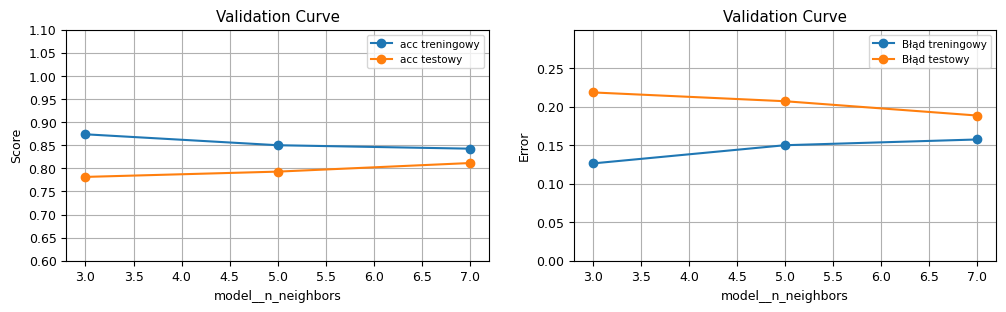

In [9]:
# Zdefiniuj model KNN
model = pipe_KNeighborsClassifier

# Parametry do przeszukiwania przestrzeni hiperparametrów
param_grid_knn = {
    'model__n_neighbors': [3, 5, 7],      # Liczba sąsiadów
    'model__weights': ['uniform', 'distance'],     # Waga sąsiadów
    'model__p': [1, 2],                          # Norma odległości (1 - Manhattan, 2 - Euclidean)
}


results_knn = perform_randomized_search(param_grid_knn, X_train, y_train, model, cv=cv, n_iter=100)
display(results_knn.head())

plot_validation_curve(model, X_train, y_train, param_name='model__n_neighbors', param_grid=param_grid_knn, cv=cv, scoring="accuracy")


Najlepsze parametry: {'model__kernel': 'rbf', 'model__C': 10}


,param_model__kernel,param_model__C,mean_test_AUC,rank_test_AUC,mean_train_AUC,mean_test_Accuracy,rank_test_Accuracy,mean_train_Accuracy
17,rbf,10,0.865021,3,0.967731,0.822857,1,0.922857
12,rbf,1,0.870164,1,0.905387,0.807143,2,0.845079
11,poly,1,0.867307,2,0.921783,0.802857,3,0.868095
16,poly,10,0.855042,5,0.972394,0.795714,4,0.929206
6,poly,0.1,0.857411,4,0.878728,0.785714,5,0.815714


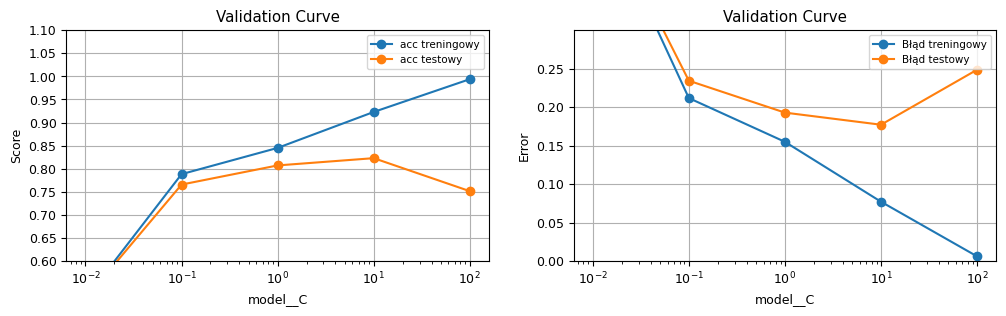

In [10]:
param_grid_svm = {
    'model__C': [0.01,0.1, 1, 10,100],  # Parametr regularyzacji
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],  # Rodzaj jądra (kernel)
    }

model = pipe_SVC

results = perform_randomized_search(param_grid_svm, X_train, y_train, model, cv=cv, n_iter=100)
display(results.head())

plot_validation_curve(model, X_train, y_train, param_name='model__C', param_grid=param_grid_svm, cv=cv, scoring="accuracy",use_log_scale=True)


Najlepsze parametry: {'model__penalty': 'l2', 'model__C': 0.1}


,param_model__penalty,param_model__C,mean_test_AUC,rank_test_AUC,mean_train_AUC,mean_test_Accuracy,rank_test_Accuracy,mean_train_Accuracy
1,l2,0.1,0.848658,1,0.862197,0.784286,1,0.798095
3,l2,1,0.848005,2,0.864740,0.777143,2,0.798571
5,l2,10,0.847925,3,0.865010,0.777143,2,0.799841
0,l1,0.1,NaN,4,NaN,NaN,4,NaN
2,l1,1,NaN,4,NaN,NaN,4,NaN


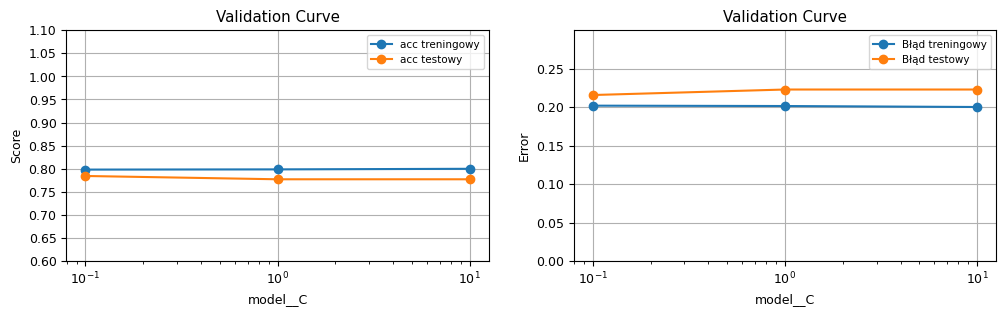

In [11]:
# Definiuj siatkę hiperparametrów do przeszukania dla LogisticRegression
lr_param_grid = {
    'model__C': [0.1, 1, 10],               # Parametr regularyzacji
    'model__penalty': ['l1', 'l2'],         # Rodzaj regularyzacji
}
model = pipe_LogisticRegression

results = perform_randomized_search(lr_param_grid, X_train, y_train, model, cv=cv, n_iter=100)
display(results.head())

plot_validation_curve(model, X_train, y_train, param_name='model__C', param_grid=lr_param_grid, cv=cv, scoring="accuracy",use_log_scale=True)

Najlepsze parametry: {'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_depth': 5, 'model__criterion': 'gini'}


,param_model__min_samples_leaf,param_model__max_depth,param_model__criterion,mean_test_AUC,rank_test_AUC,mean_train_AUC,mean_test_Accuracy,rank_test_Accuracy,mean_train_Accuracy
38,1,5,gini,0.801880,6,0.901864,0.775714,1,0.850317
99,2,5,gini,0.802162,5,0.900922,0.774286,2,0.847143
88,4,5,gini,0.792069,21,0.898747,0.772857,3,0.840794
93,4,5,gini,0.794242,17,0.898457,0.772857,3,0.840635
9,1,6,gini,0.803230,4,0.932236,0.772857,3,0.874444


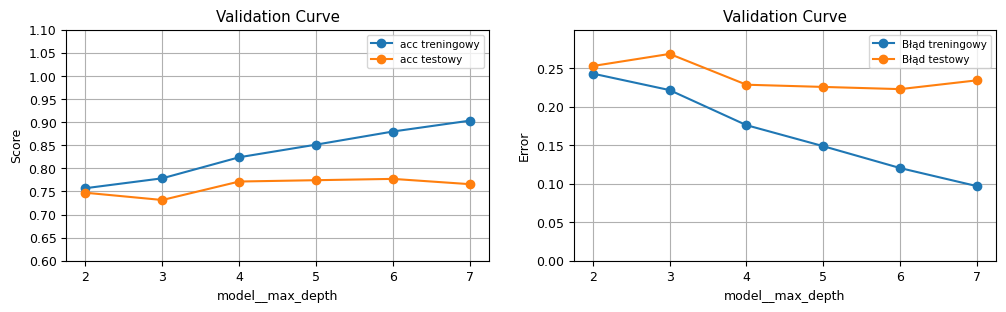

In [12]:
# Definiuj siatkę hiperparametrów do przeszukania dla Decision Tree
tree_param_grid = {
    'model__criterion': ['gini', 'entropy'],       # Kryterium podziału
    'model__max_depth': [2,3,4,5,6,7],        # Maksymalna głębokość drzewa
    'model__min_samples_split': [1,2,3,4,5,6],       # Minimalna liczba próbek do podziału węzła
    'model__min_samples_leaf': [1,2,3,4,5]          # Minimalna liczba próbek w liściu
}

model = pipe_DecisionTreeClassifier

results = perform_randomized_search(tree_param_grid, X_train, y_train, model, cv=cv, n_iter=100)
display(results.head())

plot_validation_curve(model, X_train, y_train, param_name='model__max_depth', param_grid=tree_param_grid, cv=cv, scoring="accuracy")




Najlepsze parametry: {'model__solver': 'lsqr', 'model__shrinkage': 'auto', 'model__n_components': 1}


,param_model__solver,param_model__shrinkage,param_model__n_components,mean_test_AUC,rank_test_AUC,mean_train_AUC,mean_test_Accuracy,rank_test_Accuracy,mean_train_Accuracy
1,lsqr,auto,1,0.848335,5,0.862763,0.785714,1,0.797460
2,eigen,auto,1,0.848335,5,0.862763,0.785714,1,0.797460
8,eigen,0.2,1,0.849394,3,0.861768,0.784286,3,0.798413
7,lsqr,0.2,1,0.849394,3,0.861768,0.784286,3,0.798413
4,lsqr,0.1,1,0.849558,1,0.863210,0.781429,5,0.803175


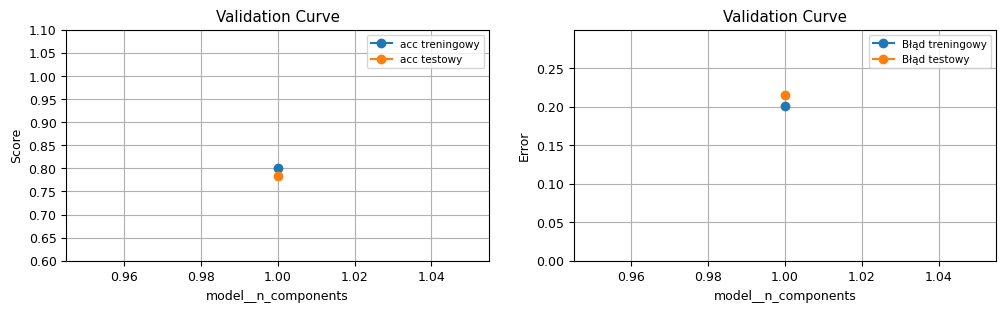

In [13]:
# Definiuj siatkę hiperparametrów do przeszukania dla LDA
lda_param_grid = {
    'model__solver': ['svd', 'lsqr', 'eigen'],  # Wybór metody rozwiązywania
    'model__n_components': [ 1, 2, 3,4,5,6],     # Liczba komponentów do wyodrębnienia
    'model__shrinkage': [ 'auto', 0.1, 0.2,0.3,0.4] # Współczynnik kurczenia (tylko dla 'lsqr' i 'eigen')
}

model = pipe_LinearDiscriminantAnalysis

results_lda = perform_randomized_search(lda_param_grid, X_train, y_train, model, cv=cv, n_iter=100)
display(results_lda.head())

plot_validation_curve(model, X_train, y_train, param_name='model__n_components', param_grid=lda_param_grid, cv=cv, scoring="accuracy")




Najlepsze parametry: {'model__store_covariance': True, 'model__reg_param': 0.1}


,param_model__store_covariance,param_model__reg_param,mean_test_AUC,rank_test_AUC,mean_train_AUC,mean_test_Accuracy,rank_test_Accuracy,mean_train_Accuracy
2,True,0.1,0.880712,1,0.916252,0.817143,1,0.857460
3,False,0.1,0.880712,1,0.916252,0.817143,1,0.857460
6,True,0.3,0.864271,5,0.892709,0.815714,3,0.831111
7,False,0.3,0.864271,5,0.892709,0.815714,3,0.831111
4,True,0.2,0.872614,3,0.904491,0.812857,5,0.846190


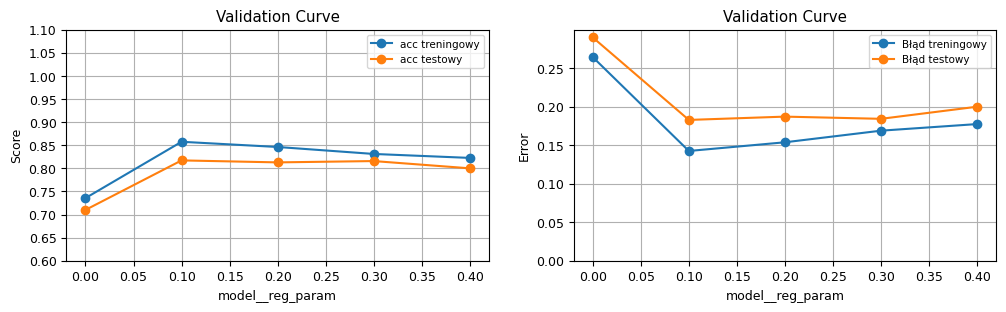

In [14]:
# Definiuj siatkę hiperparametrów do przeszukania dla QDA
qda_param_grid = {
    'model__reg_param': [0.0, 0.1, 0.2, 0.3, 0.4],  # Parametr regularyzacji
    'model__store_covariance': [True, False],  # Określa, czy przechowywać macierze kowariancji
}

model_qda = pipe_QuadraticDiscriminantAnalysis  # Przyjmując, że masz już zdefiniowany potok dla QDA

results_qda = perform_randomized_search(qda_param_grid, X_train, y_train, model_qda, cv=cv, n_iter=100)
display(results_qda.head())

plot_validation_curve(model_qda, X_train, y_train, param_name='model__reg_param', param_grid=qda_param_grid, cv=cv, scoring="accuracy")


Najlepsze parametry: {'model__n_estimators': 800, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_features': 'auto', 'model__max_depth': 7}


,param_model__n_estimators,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,mean_test_AUC,rank_test_AUC,mean_train_AUC,mean_test_Accuracy,rank_test_Accuracy,mean_train_Accuracy
27,800,4,auto,7,0.877603,15,0.954805,0.825714,1,0.898730
31,800,1,sqrt,7,0.879649,2,0.980081,0.824286,2,0.926349
36,600,2,auto,7,0.880058,1,0.970965,0.824286,2,0.914127
95,600,2,auto,7,0.878669,4,0.969439,0.822857,4,0.912698
94,600,2,sqrt,7,0.877031,19,0.959023,0.822857,4,0.903333


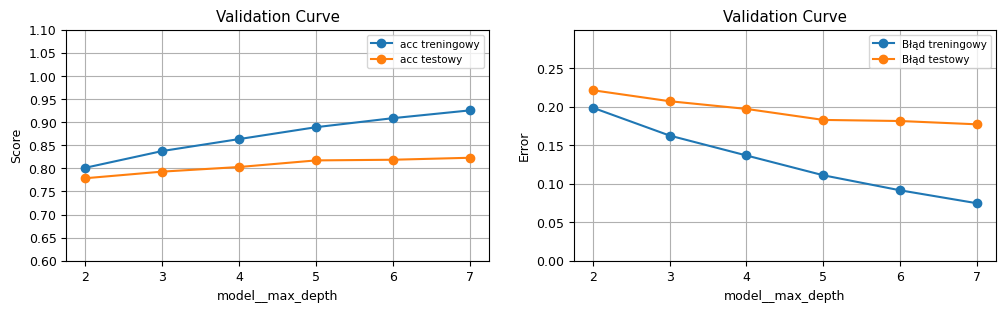

In [15]:
# Definiuj siatkę hiperparametrów do przeszukania dla rf
rf_param_grid = {
 'model__max_depth': [2,3,4,5,6,7],
 'model__max_features': ['auto', 'sqrt'],
 'model__min_samples_leaf': [1, 2, 4],
 'model__min_samples_split': [2, 5, 10],
 'model__n_estimators': [200, 400, 600, 800]}


model = pipe_RandomForest


results_rf = perform_randomized_search(rf_param_grid, X_train, y_train, model, cv=cv, n_iter=100)
display(results_rf.head())

plot_validation_curve(model, X_train, y_train, param_name='model__max_depth', param_grid=rf_param_grid, cv=cv, scoring="accuracy")

Najlepsze parametry: {'model__n_estimators': 200, 'model__learning_rate': 0.1}


,param_model__n_estimators,param_model__learning_rate,mean_test_AUC,rank_test_AUC,mean_train_AUC,mean_test_Accuracy,rank_test_Accuracy,mean_train_Accuracy
9,200,0.1,0.861197,1,0.892151,0.805714,1,0.819524
10,250,0.1,0.858789,4,0.895594,0.802857,2,0.821587
11,300,0.1,0.860588,2,0.898911,0.801429,3,0.823175
8,150,0.1,0.860544,3,0.887195,0.800000,4,0.818095
7,100,0.1,0.858422,5,0.878215,0.790000,5,0.815873


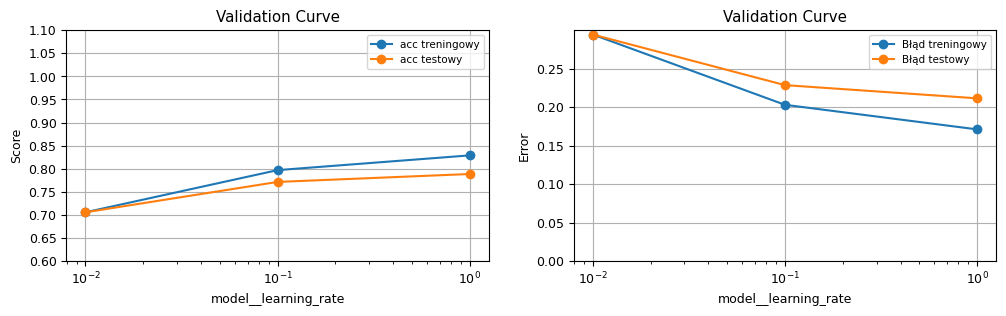

In [16]:
from sklearn.ensemble import AdaBoostClassifier

# Definiuj siatkę hiperparametrów do przeszukania dla AdaBoost
ada_param_grid = {
    'model__n_estimators': [50, 100, 150, 200, 250,300],
    'model__learning_rate': [0.01, 0.1, 1.0],
}

model = pipe_AdaBoost
results_ada = perform_randomized_search(ada_param_grid, X_train, y_train, model, cv=cv, n_iter=100)
display(results_ada.head())

plot_validation_curve(model, X_train, y_train, param_name='model__learning_rate', param_grid=ada_param_grid, cv=cv, scoring="accuracy", use_log_scale=True)

Najlepsze parametry: {'model__n_estimators': 50, 'model__max_depth': 3, 'model__learning_rate': 0.1}


,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,mean_test_AUC,rank_test_AUC,mean_train_AUC,mean_test_Accuracy,rank_test_Accuracy,mean_train_Accuracy
15,50,3,0.1,0.873438,1,0.950811,0.814286,1,0.895873
9,400,4,0.01,0.868293,3,0.975175,0.811429,2,0.916190
4,400,3,0.01,0.870044,2,0.941168,0.811429,2,0.885079
3,300,3,0.01,0.865753,7,0.929357,0.807143,4,0.872857
13,300,5,0.01,0.858070,14,0.989437,0.805714,5,0.944286


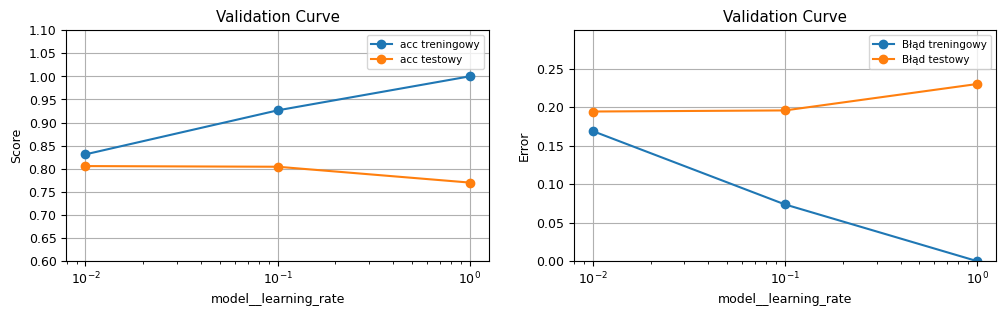

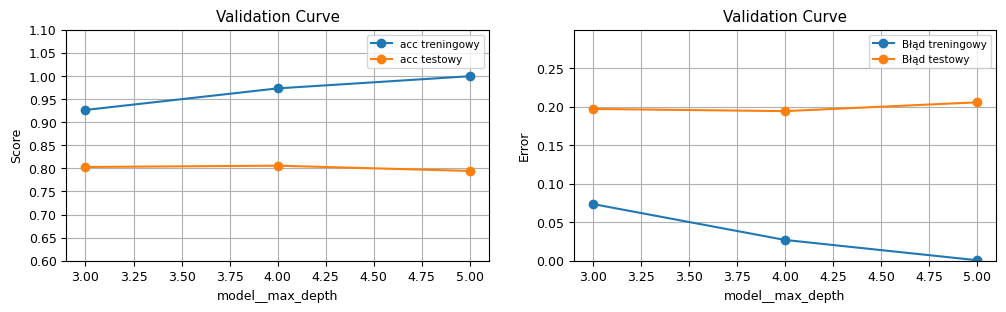

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Definiuj siatkę hiperparametrów do przeszukania dla Gradient Boosting
gb_param_grid = {
    'model__n_estimators': [50, 100, 200,300,400],
    'model__learning_rate': [0.01, 0.1, 1.0],
    'model__max_depth': [3, 4, 5],
}


model = pipe_GradientBoosting
results_gb = perform_randomized_search(gb_param_grid, X_train, y_train, model, cv=cv, n_iter=100)
display(results_gb.head())

plot_validation_curve(model, X_train, y_train, param_name='model__learning_rate', param_grid=gb_param_grid, cv=cv, scoring="accuracy", use_log_scale=True)
plot_validation_curve(model, X_train, y_train, param_name='model__max_depth', param_grid=gb_param_grid, cv=cv, scoring="accuracy")


Najlepsze parametry: {'model__n_estimators': 150, 'model__max_depth': 6}


,param_model__n_estimators,param_model__max_depth,mean_test_AUC,rank_test_AUC,mean_train_AUC,mean_test_Accuracy,rank_test_Accuracy,mean_train_Accuracy
41,500,7,0.875980,6,0.971283,0.810000,1,0.910635
36,150,7,0.875734,7,0.970726,0.810000,1,0.910952
32,300,6,0.873853,12,0.947573,0.810000,1,0.889206
29,150,6,0.874996,8,0.947594,0.810000,1,0.888413
24,250,5,0.871401,15,0.922514,0.808571,5,0.857937


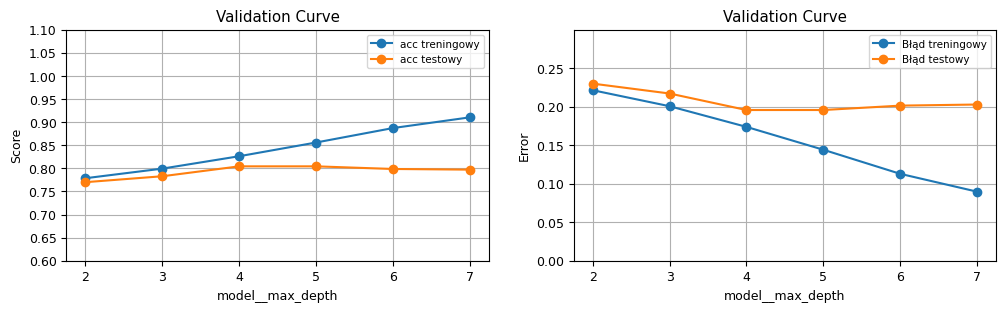

In [18]:


# Definiuj siatkę hiperparametrów dla ExtraTreesClassifier
extra_trees_param_grid = {
    'model__n_estimators': [50, 150,200,250,300,400,500],
    'model__max_depth': [2,3,4,5,6,7],
}


model = pipe_ExtraTrees
results_ext = perform_randomized_search(extra_trees_param_grid, X_train, y_train, model, cv=cv, n_iter=100)
display(results_ext.head())

plot_validation_curve(model, X_train, y_train, param_name='model__max_depth', param_grid=extra_trees_param_grid, cv=cv, scoring="accuracy")



Najlepsze parametry: {'model__n_estimators': 200, 'model__base_estimator__max_depth': 4}


,param_model__n_estimators,param_model__base_estimator__max_depth,mean_test_AUC,rank_test_AUC,mean_train_AUC,mean_test_Accuracy,rank_test_Accuracy,mean_train_Accuracy
20,200,4,0.861176,17,0.915876,0.802857,1,0.853968
37,100,7,0.860761,18,0.987265,0.801429,2,0.938889
23,500,4,0.857985,22,0.916882,0.800000,3,0.853333
40,400,7,0.865424,4,0.987773,0.800000,3,0.937778
38,200,7,0.863379,12,0.987765,0.798571,5,0.936825


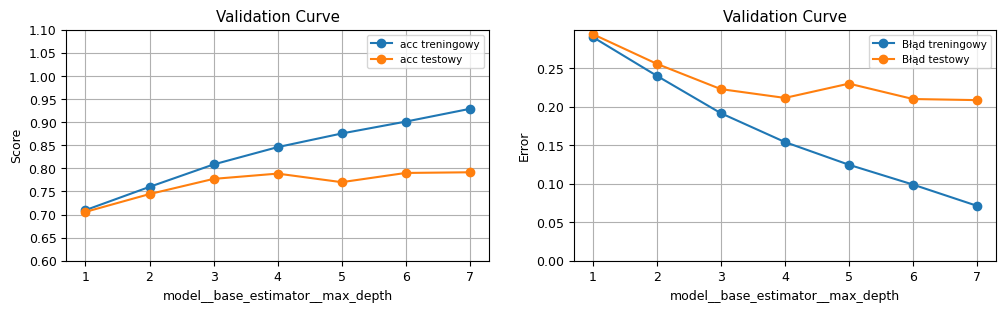

In [19]:
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier


# Definiuj siatkę hiperparametrów dla BaggingClassifier z drzewami
bagging_tree_param_grid = {
    'model__base_estimator__max_depth': [1,2,3,4,5,6,7],
    'model__n_estimators': [50, 100, 200,300,400,500],
}

model = pipe_BaggingWithReplacement_tree
results_ext = perform_randomized_search(bagging_tree_param_grid, X_train, y_train, model, cv=cv, n_iter=100)
display(results_ext.head())

plot_validation_curve(model, X_train, y_train, param_name='model__base_estimator__max_depth', param_grid=bagging_tree_param_grid, cv=cv, scoring="accuracy")




In [20]:



# DEFINIOWANIE HIPERPARAMETROW UZYSKANYCH Z SZUKANIA SIATKI GRID I WIZUALIZACJI KRZYWYCH ZŁOŻONOŚCI MODELI 
# WG WYBRANYCH HIPERPARAMETROW BY UNIKNĄĆ NIEDOTRENOWANIA I PRZETRENOWANIA

pipe_best_SVC = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVC(probability=True, kernel='rbf', C=1))])

pipe_best_GaussianNB = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GaussianNB())])

pipe_best_LogisticRegression = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(C= 1, penalty= 'l2'))])

pipe_best_KNeighborsClassifier = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2))])

pipe_best_DecisionTreeClassifier = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(criterion= 'gini', max_depth = 4, min_samples_leaf= 1, min_samples_split= 4))])

pipe_best_LinearDiscriminantAnalysis = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto',n_components=1))])

pipe_best_QuadraticDiscriminantAnalysis = Pipeline([
    ('preprocessor', preprocessor),
    ('model', QuadraticDiscriminantAnalysis(store_covariance=True,reg_param=0.1))])

pipe_best_RandomForest = Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier(n_estimators=400,min_samples_split=2,min_samples_leaf=1,max_depth=4))])

pipe_best_ExtraTrees = Pipeline([
    ('preprocessor', preprocessor),
    ('model', ExtraTreesClassifier(n_estimators=250,max_depth=6) )]) 

pipe_best_AdaBoost = Pipeline([
        ('preprocessor', preprocessor),
        ('model', AdaBoostClassifier(n_estimators= 200,learning_rate= 0.1))])

pipe_best_GradientBoosting = Pipeline([
        ('preprocessor', preprocessor),
        ('model', GradientBoostingClassifier(n_estimators= 400,max_depth= 4,learning_rate= 0.01 ))])   

pipe_best_BaggingWithReplacement_tree = Pipeline([
    ('preprocessor', preprocessor),
    ('model', BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=4), 
    n_estimators=100,  
    random_state=42,  
    bootstrap=True,  
    n_jobs=-1 ))
])




klasyfikatory_best = {
    'SVC': pipe_best_SVC,
    'GaussianNB': pipe_best_GaussianNB,
    'LogisticRegression': pipe_best_LogisticRegression,
    'KNeighborsClassifier': pipe_best_KNeighborsClassifier,
    'DecisionTreeClassifier': pipe_best_DecisionTreeClassifier,
    'LinearDiscriminantAnalysis': pipe_best_LinearDiscriminantAnalysis,
    'QuadraticDiscriminantAnalysis': pipe_best_QuadraticDiscriminantAnalysis,
    'Random Forest': pipe_best_RandomForest,
    'ExtraTreesClassifier': pipe_best_ExtraTrees,
    'AdaBoost': pipe_best_AdaBoost,
    'Gradient Boosting': pipe_best_GradientBoosting,
    'BaggingClassifier_tree' : pipe_best_BaggingWithReplacement_tree,
}


import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_predict


def score_train(models, X_val, y_val, cv):
    results = {}
    confusion_matrices = {}  # Dodaj słownik do przechowywania macierzy pomyłek
    
    for model_name, model in models.items():
        model.fit(X_val, y_val)
        y_val_pred = cross_val_predict(model, X_val, y_val, cv=cv)
        cm_test = confusion_matrix(y_val, y_val_pred)
        TP, FP, FN, TN = cm_test.ravel()
        accuracy = accuracy_score(y_val, y_val_pred)
        error_ratio = (FP + FN) / (TP + TN + FP + FN)
        precision_pos = precision_score(y_val, y_val_pred, pos_label='tak')
        precision_neg = precision_score(y_val, y_val_pred, pos_label='nie')
        recall_pos = recall_score(y_val, y_val_pred, pos_label='tak')
        recall_neg = recall_score(y_val, y_val_pred, pos_label='nie')
        f1 = f1_score(y_val, y_val_pred, pos_label='tak')
        
        results[model_name] = {
            'TP': TP,
            'FP': FP,
            'FN': FN,
            'TN': TN,
            'Accuracy': accuracy,
            'Error Ratio': error_ratio,
            'Precision (Pos)': precision_pos,
            'Precision (Neg)': precision_neg,
            'Recall (Pos)': recall_pos,
            'Recall (Neg)': recall_neg,
            'F1 Score': f1
        }
    

    results_df = pd.DataFrame(results).T
    return results_df.round(4)

# Użyj funkcji score_val na klasyfikatorach
results_df = score_train(klasyfikatory_best, X_val, y_val, cv)
df_sorted = results_df.sort_values(by='Accuracy', ascending=False)
display(df_sorted)



,TP,FP,FN,TN,Accuracy,Error Ratio,Precision (Pos),Precision (Neg),Recall (Pos),Recall (Neg),F1 Score
QuadraticDiscriminantAnalysis,54.0,17.0,11.0,68.0,0.8133,0.1867,0.8000,0.8308,0.8608,0.7606,0.8293
Random Forest,55.0,16.0,12.0,67.0,0.8133,0.1867,0.8072,0.8209,0.8481,0.7746,0.8272
ExtraTreesClassifier,54.0,17.0,14.0,65.0,0.7933,0.2067,0.7927,0.7941,0.8228,0.7606,0.8075
LogisticRegression,52.0,19.0,14.0,65.0,0.7800,0.2200,0.7738,0.7879,0.8228,0.7324,0.7975
LinearDiscriminantAnalysis,50.0,21.0,12.0,67.0,0.7800,0.2200,0.7614,0.8065,0.8481,0.7042,0.8024
SVC,47.0,24.0,13.0,66.0,0.7533,0.2467,0.7333,0.7833,0.8354,0.6620,0.7811
AdaBoost,48.0,23.0,16.0,63.0,0.7400,0.2600,0.7326,0.7500,0.7975,0.6761,0.7636
Gradient Boosting,46.0,25.0,16.0,63.0,0.7267,0.2733,0.7159,0.7419,0.7975,0.6479,0.7545
BaggingClassifier_tree,49.0,22.0,22.0,57.0,0.7067,0.2933,0.7215,0.6901,0.7215,0.6901,0.7215
KNeighborsClassifier,41.0,30.0,19.0,60.0,0.6733,0.3267,0.6667,0.6833,0.7595,0.5775,0.7101


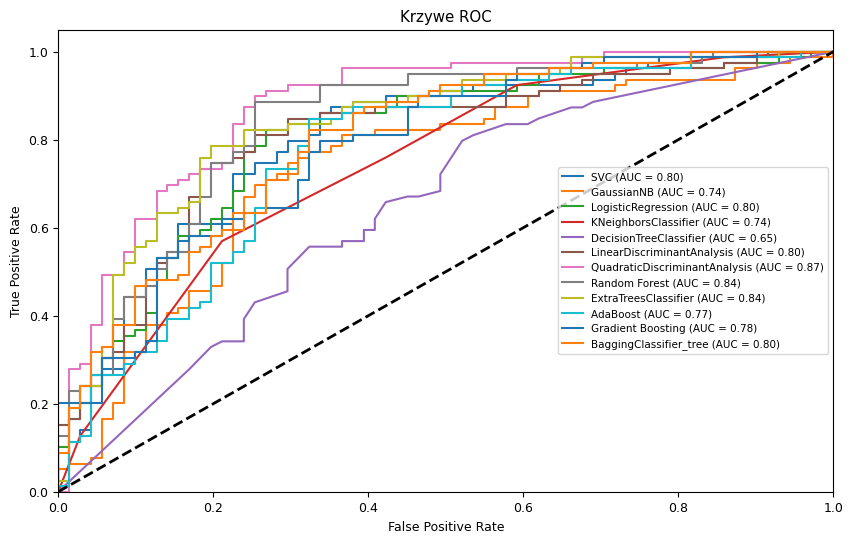

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(models, X_val, y_val):
    plt.figure(figsize=(10, 6))
    for model_name, model in models.items():
        y_scores = cross_val_predict(model, X_val, y_val, cv=cv, method="predict_proba")
        fpr, tpr, thresholds = roc_curve(y_val, y_scores[:, 1], pos_label='tak')
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Krzywe ROC')
    plt.legend(fontsize='small')
    plt.show()

# Użyj funkcji plot_roc_curves na klasyfikatorach
plot_roc_curves(klasyfikatory_best, X_val, y_val)


In [22]:

voting_clf_hard = VotingClassifier(estimators=list(klasyfikatory_best.items()), voting='hard')
voting_clf_soft = VotingClassifier(estimators=list(klasyfikatory_best.items()), voting='soft')

voting_clf_hard.fit(X_val, y_val)
voting_clf_soft.fit(X_val, y_val)

pipe_voting_classifier_soft = Pipeline([
    ('model', voting_clf_soft)])

pipe_voting_classifier_hard = Pipeline([
    ('model', voting_clf_hard)])


klasyfikatory_voting = {
    'Voting soft': pipe_voting_classifier_soft,
    'Voting hard': pipe_voting_classifier_hard,
}



In [23]:
from sklearn.ensemble import StackingClassifier



# Przygotujmy listę z klasyfikatorami bazowymi i ich nazwami
estymatory_bazowe = [(nazwa, klasyfikator) for nazwa, klasyfikator in klasyfikatory_best.items()]

# Stwórz model meta-klasyfikatora 
meta_model = RandomForestClassifier()  # Przykładowy meta-klasyfikator

# Tworzymy model StackingClassifier
stacking_clf = StackingClassifier(estimators=estymatory_bazowe, final_estimator=meta_model, stack_method='auto')

# Trenuj model stacking
stacking_clf.fit(X_val, y_val)

# Tworzymy pipeline dla modelu stacking
pipe_stacking_classifier = Pipeline([
    ('model', stacking_clf)])

# Dodajemy model stacking do słownika klasyfikatorów
klasyfikatory_voting['Stacking'] = pipe_stacking_classifier

# Teraz możemy ocenić wyniki modeli
results_df = score_train(klasyfikatory_voting, X_val, y_val, cv)
display(results_df)


,TP,FP,FN,TN,Accuracy,Error Ratio,Precision (Pos),Precision (Neg),Recall (Pos),Recall (Neg),F1 Score
Voting soft,54.0,17.0,18.0,61.0,0.7667,0.2333,0.7821,0.7500,0.7722,0.7606,0.7771
Voting hard,55.0,16.0,15.0,64.0,0.7933,0.2067,0.8000,0.7857,0.8101,0.7746,0.8050
Stacking,56.0,15.0,11.0,68.0,0.8267,0.1733,0.8193,0.8358,0.8608,0.7887,0.8395


In [24]:


# Predykcja na danych testowych


# Prawdopodobieństwo przynależności do klasy pozytywnej (klasa 1) dla danych testowych


def score_test(model):
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    cm_test = confusion_matrix(y_test, y_test_pred)
    TP, FP, FN, TN = cm_test.ravel()
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    error_ratio = (FP + FN) / (TP + TN + FP + FN)
    precision_pos = TP / (TP + FP)
    precision_neg = TN / (TN + FN)
    recall_pos = TP / (TP + FN)
    recall_neg = TN / (TN + FP)
    f1_score = 2 * (precision_pos * recall_pos) / (precision_pos + recall_pos)
    roc_auc_test = roc_auc_score(y_test, y_test_proba)
    cohen_kappa = cohen_kappa_score(y_test, y_test_pred)
    matthews_corrcoef_score = matthews_corrcoef(y_test, y_test_pred)
    data = {'miara': ['TP', 'FP', 'FN', 'TN','accuracy','error_ratio', 'precision_pos','precision_neg','recall_pos', 'recall_neg','f1_score',
                      'roc_auc_test','cohen_kappa','matthews_corrcoef_score'],
            'wartość': [TP, FP, FN, TN,accuracy,error_ratio, precision_pos,precision_neg,recall_pos, recall_neg,f1_score,
                        roc_auc_test,cohen_kappa,matthews_corrcoef_score]}
    df = pd.DataFrame(data).set_index('miara')
    print('=========================================================OCENA MODELU NA ZBIORZE TESTOWYM =========================================================')
    return df


print()


In [25]:

pipe_best_RandomForest = Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier(n_estimators=600,min_samples_split=2,min_samples_leaf=1,max_depth=4))])



pipe_best_RandomForest.fit(X, y)

display(score_test(pipe_best_RandomForest).T)

=========================================================OCENA MODELU NA ZBIORZE TESTOWYM =========================================================


miara,TP,FP,FN,TN,accuracy,error_ratio,precision_pos,precision_neg,recall_pos,recall_neg,f1_score,roc_auc_test,cohen_kappa,matthews_corrcoef_score
wartość,58.0,10.0,5.0,77.0,0.9,0.1,0.852941,0.939024,0.920635,0.885057,0.885496,0.926291,0.796968,0.798799


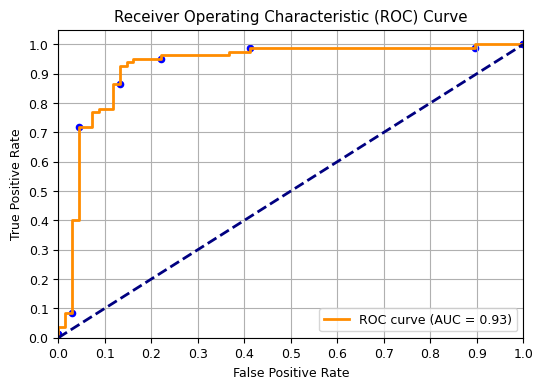

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
# Przekształć etykiety na 0 i 1

y_test_binary = (y_test == 'tak').astype(int)
y_test_proba = pipe_best_RandomForest.predict_proba(X_test)[:, 1]
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_test_proba)

# Calculate the ROC AUC
roc_auc = roc_auc_score(y_test_binary, y_test_proba)



import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
thresh_points = np.linspace(0, 1, num=10)
for thresh_point in thresh_points:
    index = np.argmin(np.abs(thresholds - thresh_point))
    plt.scatter(fpr[index], tpr[index], c='blue', s=20)

plt.show()




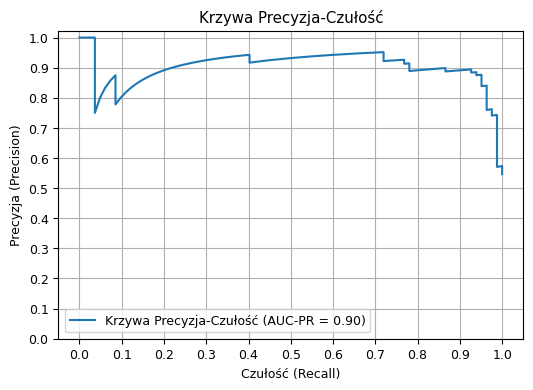

In [27]:
from sklearn.metrics import precision_recall_curve, auc

# Przekształć etykiety na 0 i 1
y_test_binary = (y_test == 'tak').astype(int)


precision, recall, thresholds = precision_recall_curve(y_test_binary, y_test_proba)
auc_pr = auc(recall, precision)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label='Krzywa Precyzja-Czułość (AUC-PR = {:.2f})'.format(auc_pr))
plt.xlabel('Czułość (Recall)')
plt.ylabel('Precyzja (Precision)')
plt.title('Krzywa Precyzja-Czułość')
plt.legend(loc='lower left')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.show()


Wyniki miar jakości klasyfikacji dla różnej wielkosci progu:



,Threshold,TP,FP,FN,TN,Accuracy,Precision,Recall,F1 Score
0,0.00,0,68,0,82,0.546667,0.546667,1.000000,0.706897
1,0.05,0,68,0,82,0.546667,0.546667,1.000000,0.706897
2,0.10,0,68,0,82,0.546667,0.546667,1.000000,0.706897
3,0.15,4,64,0,82,0.573333,0.561644,1.000000,0.719298
4,0.20,14,54,1,81,0.633333,0.600000,0.987805,0.746544
5,0.25,21,47,1,81,0.680000,0.632812,0.987805,0.771429
6,0.30,34,34,1,81,0.766667,0.704348,0.987805,0.822335
7,0.35,43,25,3,79,0.813333,0.759615,0.963415,0.849462
8,0.40,48,20,3,79,0.846667,0.797980,0.963415,0.872928
9,0.45,56,12,4,78,0.893333,0.866667,0.951220,0.906977


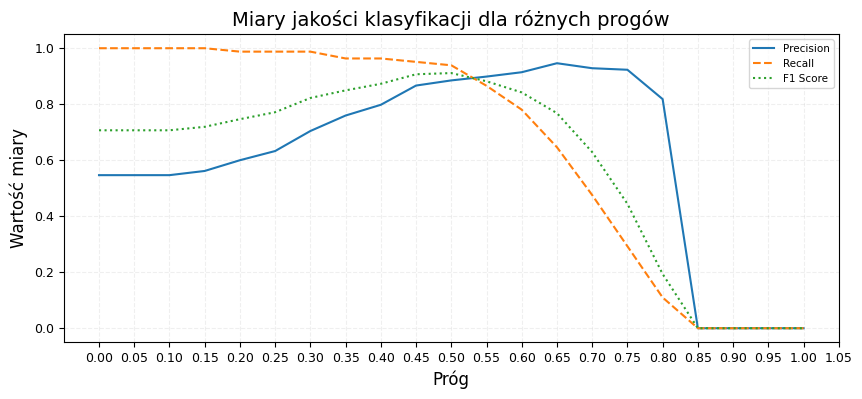

In [28]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

thresholds = np.arange(0, 1.01, 0.05)

# Przekształć etykiety na 0 i 1
y_test_binary = (y_test == 'tak').astype(int)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

print("Wyniki miar jakości klasyfikacji dla różnej wielkosci progu:")
print()
# Testujemy różne progi
threshold_results = []
for thresh_point in thresholds:
    # Używamy wybranego progu do przekształcenia prawdopodobieństw na etykiety klasyfikacji
    y_test_pred_thresh = (y_test_proba >= thresh_point).astype(int)
    
    # Obliczamy miary jakości klasyfikacji dla danego progu
    accuracy = accuracy_score(y_test_binary, y_test_pred_thresh)
    precision = precision_score(y_test_binary, y_test_pred_thresh)
    recall = recall_score(y_test_binary, y_test_pred_thresh)
    f1 = f1_score(y_test_binary, y_test_pred_thresh)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    cm = confusion_matrix(y_test_binary, y_test_pred_thresh)
    TP, FP, FN, TN = cm.ravel()
    threshold_results.append((thresh_point, TP, FP, FN, TN, accuracy, precision, recall, f1))

threshold_results_df = pd.DataFrame(threshold_results, columns=['Threshold', 'TP', 'FP', 'FN', 'TN','Accuracy', 'Precision', 'Recall', 'F1 Score'])
display(threshold_results_df.sort_values(by='Threshold', ascending=True).head(20))
print()


# Tworzenie wykresu
plt.figure(figsize=(10, 4))
line_styles = ['-', '--', ':']  
metric_names = ['Precision', 'Recall', 'F1 Score']
for i, metric in enumerate([precision_scores, recall_scores, f1_scores]):
    plt.plot(thresholds, metric, label=metric_names[i], lw=1.5, linestyle=line_styles[i])
plt.legend(fontsize='small')
plt.xlabel('Próg', fontsize=12)
plt.ylabel('Wartość miary', fontsize=12)
plt.title('Miary jakości klasyfikacji dla różnych progów', fontsize=14)
plt.xticks(np.arange(0, 1.1, 0.05))
plt.grid(True, linestyle='--', alpha=0.2)

plt.show()



miara,TP,FP,FN,TN,accuracy,error_ratio,precision_pos,precision_neg,recall_pos,recall_neg,f1_score,roc_auc_test,cohen_kappa,matthews_corrcoef_score
wartość,58.0,10.0,5.0,77.0,0.9,0.1,0.852941,0.939024,0.920635,0.885057,0.885496,0.926291,0.796968,0.798799


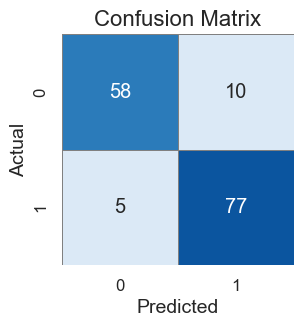

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Użyj wytrenowanego modelu na danych testowych przy ustalonym progu
y_test_pred = (y_test_proba >= 0.5).astype(int)

def score_test():
    cm_test = confusion_matrix(y_test_binary, y_test_pred)
    TP, FP, FN, TN = cm_test.ravel()
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    error_ratio = (FP + FN) / (TP + TN + FP + FN)
    precision_pos = TP / (TP + FP)
    precision_neg = TN / (TN + FN)
    recall_pos = TP / (TP + FN)
    recall_neg = TN / (TN + FP)
    f1_score = 2 * (precision_pos * recall_pos) / (precision_pos + recall_pos)
    roc_auc_test = roc_auc_score(y_test_binary, y_test_proba)
    cohen_kappa = cohen_kappa_score(y_test_binary, y_test_pred)
    matthews_corrcoef_score = matthews_corrcoef(y_test_binary, y_test_pred)
    data = {'miara': ['TP', 'FP', 'FN', 'TN','accuracy','error_ratio', 'precision_pos','precision_neg','recall_pos', 'recall_neg','f1_score',
                      'roc_auc_test','cohen_kappa','matthews_corrcoef_score'],
            'wartość': [TP, FP, FN, TN,accuracy,error_ratio, precision_pos,precision_neg,recall_pos, recall_neg,f1_score,
                        roc_auc_test,cohen_kappa,matthews_corrcoef_score]}
    df = pd.DataFrame(data).set_index('miara')
    return df

results = score_test().T
display(results)


cm_test = confusion_matrix(y_test_binary, y_test_pred)

plt.figure(figsize=(3, 3))
sns.set(font_scale=1.2)  
sns.set_style("whitegrid") 
cmap = sns.color_palette("Blues") 

sns.heatmap(cm_test, annot=True, fmt="d", cmap=cmap, cbar=False, linewidths=0.5, linecolor='gray')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
